**2.1** 誤差関数と勾配降下法の考えを導入しアナログ値対応します。

**2.2** 元のパーセプトロンのソースを確認します。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [ ]:
def h(x):
    if x > 0.0:
        return 1.0
    else:
        return 0.0

In [ ]:
def output_perceptron(w, x):
    # s = np.sum(w*x)
    s = 0.0
    for i in range(len(w)):
        s += w[i] * x[i]
    y = h(s - b)
    return y

In [ ]:
def train_perceptron(w, x, t):
    y = output_perceptron(w, x)
    for i in range(len(w)):
        dw = alpha*(t - y)*x[i]
        w[i] += dw
    square_error = np.square(t - y)
    return square_error

In [ ]:
def train_layer(neurons_w, data, teacher):
    square_error = 0.0
    for i in range(len(neurons_w)):
        square_error += train_perceptron(neurons_w[i], data, teacher[i])
    return square_error

In [ ]:
def train_mnist(train_count):
    images, labels = mnist.train.next_batch(train_count)
    square_error = 0.0
    for i in range(len(images)):
        x = images[i]
        t = labels[i]
        square_error += train_layer(neurons_w, x, t)
    print(square_error/train_count/10) # 1ニューロンあたりの誤差

In [ ]:
def calc_square_error(O, T):
    return np.sum(np.square(O - T))

In [ ]:
neurons_w = np.random.rand(10, 28*28) * 0.1
b = 0.1
alpha = 0.01
train_mnist(1)

In [ ]:
def test_mnist():
    images, labels = mnist.test.next_batch(1)
    x = images[0]
    t = labels[0]
    y = np.zeros(10)
    for i in range(len(neurons_w)):
        y[i] = output_perceptron(neurons_w[i], x)
    print(t)
    print(y)
    print(np.argmax(y))
    # イメージ表示
    fig = plt.figure(figsize=(8,4))
    plt.imshow(x.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")

In [ ]:
def test_mnist_error():
    test_count = 1000
    images, labels = mnist.test.next_batch(test_count)
    ng = 0
    for j in range(len(images)):
        x = images[j]
        t = labels[j]
        y = np.zeros(10)
        for i in range(len(neurons_w)):
            y[i] = output_perceptron(neurons_w[i], x)
        if np.argmax(t) != np.argmax(y):
            ng += 1
    print(ng / test_count)

**2.3** 活性化関数、出力の式、学習の式を修正します。

**2.3.1** シグモイド関数を作ってグラフを表示してみます。

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
def dsigmoid(x):
    return x*(1 - x)

**2.3.2** 活性化関数と学習式の変更

In [ ]:
def h(x):
    return sigmoid(x)

In [ ]:
def dh(x):
    return dsigmoid(x)

**写経** シグモイド関数とシグモイド関数の微分、活性化関数と活性化関数の微分のコードを書きます。

In [ ]:
''' 元のパーセプトロンの内容
def output_perceptron(w, x):
    s = 0.0
    for i in range(len(w)):
        s += w[i] * x[i]
    y = h(s - b)
    return y
'''
def output_perceptron(w, x):
    s = np.sum(w*x)
    y = h(s - b)
    return y

**写経** 修正したコードを写経してください。

In [ ]:
''' 元のパーセプトロンの内容
def train_perceptron(w, x, t):
    y = output_perceptron(w, x)
    for i in range(len(w)):
        dw = alpha*(t - y)*x[i]
        w[i] += dw
    square_error = np.square(t - y)
    return square_error
'''
def train_perceptron(w, x, t):
    o = output_perceptron(w, x)
    delta = alpha*(t - o)*dh(o);
    w += delta*x
    square_error = np.square(t - o)
    return square_error

**写経** 修正したコードを写経してください。

In [ ]:
neurons_w = np.random.rand(10, 28*28) * 0.1
b = 0.1
alpha = 0.01
train_mnist(1)

In [ ]:
train_mnist(100)

In [ ]:
train_mnist(1000)

In [ ]:
alpha = 0.001
train_mnist(10000)

In [ ]:
test_mnist()

In [ ]:
test_mnist_error()

**2.4** バックプロパゲーションの実装

**2.4.1** クラス化

In [ ]:
class Layer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size                           # 入力数
        self.output_size = output_size                         # ニューロン数と同じ
        self.w = np.random.rand(output_size, input_size) * 0.1 # ニューロンごとに入力と同数の足がある分の重み
        self.b = np.random.rand(output_size) * 0.1             # ニューロンごとのしきい値
    
    def h(self, x):
        return sigmoid(x)
    
    def dh(self, x):
        return dsigmoid(x)
    
    def output_neuron(self, w, b, x):
        s = np.sum(w*x)
        y = h(s - b)
        return y
    
    def train_neuron(self, w, b, x, t):
        o = self.output_neuron(w, b, x)
        delta = alpha*(t - o)*self.dh(o);
        w += delta*x
        return
    
    def output_layer(self, x):
        y = np.zeros(self.output_size)
        for i in range(self.output_size):
            y[i] = self.output_neuron(self.w[i], self.b[i], x)
        return y

    def train_layer(self, x, t):
        for i in range(self.output_size):
            self.train_neuron(self.w[i], self.b[i], x, t[i])
        return

In [ ]:
layer1 = Layer(784, 10)

def train_mnist(train_count):
    images, labels = mnist.train.next_batch(train_count)
    square_error = 0.0
    for i in range(len(images)):
        x = images[i]
        t = labels[i]
        y = layer1.output_layer(x)
        layer1.train_layer(x, t)
        square_error += calc_square_error(y, t)
    print(square_error/train_count/10) # 1ニューロンあたりの誤差

train_mnist(1)   

In [ ]:
train_mnist(1000)

In [ ]:
def test_mnist():
    images, labels = mnist.test.next_batch(1)
    x = images[0]
    t = labels[0]
    y = layer1.output_layer(x)
    print(t)
    print(y)
    print(np.argmax(y))
    # イメージ表示
    fig = plt.figure(figsize=(8,4))
    plt.imshow(x.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")

In [ ]:
test_mnist()

**2.4.1** ニューロンごとの誤差の元を保持する。

In [ ]:
class Layer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size                           # 入力数
        self.output_size = output_size                         # ニューロン数と同じ
        self.neurons_W = (np.random.rand(output_size, input_size) - 0.5) * 0.1 # ニューロンごとに入力と同数の足がある分の重み
        self.neurons_b = (np.random.rand(output_size) - 0.5) * 0.2             # ニューロンごとのしきい値
        self.neurons_d = np.zeros(output_size)                                 # ニューロンごとの誤差修正値
    
    def h(self, x):
        #return sigmoid(x)
        return tanh(x)
        #return relu(x)
    
    def dh(self, y):
        #return dsigmoid(y)
        return dtanh(y)
        #return drelu(y)
    
    def output_neuron(self, W, b, X):
        s = np.sum(W*X)
        y = self.h(s - b)
        return y
    
    def train_neuron(self, W, d, X):
        W += alpha*d*X
        return
    
    def output_layer(self, X):
        y = np.zeros(self.output_size)
        for i in range(self.output_size):
            y[i] = self.output_neuron(self.neurons_W[i], self.neurons_b[i], X)
        return y

    def train_layer(self, X):
        for i in range(self.output_size):
            self.train_neuron(self.neurons_W[i], self.neurons_d[i], X)
        return
    
    # 出力層での自分自身の誤差修正値を算出
    def backprop_neuron_output(self, o, t):
        d = (t - o)*self.dh(o)
        return d
    
    # 出力層での自分自身の誤差修正値をセット
    def backprop_layer_output(self, O, T):
        for i in range(self.output_size):
            self.neurons_d[i] = self.backprop_neuron_output(O[i], T[i])
        return

    # 前のレイヤーへのニューロン毎の誤差修正値を算出
    def backprop_neuron(self, W, d):
        return W*d

    # 前のレイヤーへの誤差修正値を算出
    def backprop_layer(self):
        total_prev_D = np.zeros(self.input_size)
        for i in range(self.output_size):
            total_prev_D += self.backprop_neuron(self.neurons_W[i], self.neurons_d[i])
        return total_prev_D
    
    def set_layer_d(self, D, O):
        self.neurons_d = D*self.dh(O)

In [ ]:
layer1 = Layer(784, 10)
alpha = 0.01

def train_mnist(train_count):
    images, labels = mnist.train.next_batch(train_count)
    square_error = 0.0
    for i in range(len(images)):
        X = images[i]
        T = labels[i]
        Y = layer1.output_layer(X)
        layer1.backprop_layer_output(Y, T)
        layer1.train_layer(X)
        square_error += calc_square_error(Y, T)
    print(square_error/train_count/10) # 1ニューロンあたりの誤差

train_mnist(1)

In [ ]:
alpha = 0.01
train_mnist(10000)

In [ ]:
alpha = 0.01
train_backprop_mnist(100)

In [ ]:
# ３層ネットワーク 784x100x10
layer1 = Layer(784, 100)
layer2 = Layer(100, 10)
alpha = 0.01
mini_batch = 100
epoch = 0
epochs, dpns = [], []

def output_backprop_mnist(X):
    # 正方向でニューロンの出力
    O1 = layer1.output_layer(X)
    Y  = layer2.output_layer(O1)
    return Y

def train_backprop_mnist(train_count):
    global layer1, layer2, epoch, epochs, dpns
    for count in range(train_count):
        images, labels = mnist.train.next_batch(mini_batch)
        square_error = 0.0
        for i in range(mini_batch):
            X = images[i]
            T = labels[i]
            # 正方向でニューロンの出力
            O1 = layer1.output_layer(X)
            Y  = layer2.output_layer(O1)
            # 逆伝搬で誤差修正値をニューロン毎に算出
            layer2.backprop_layer_output(Y, T)
            D1 = layer2.backprop_layer()
            layer1.set_layer_d(D1, O1)
            # 誤差修正値を使って学習
            layer2.train_layer(O1)
            layer1.train_layer(X)
            # 二乗誤差算出
            square_error += calc_square_error(Y, T)
        epoch += mini_batch
        dpn = square_error/mini_batch/10 # 1ニューロンあたりの誤差
        epochs.append(epoch)
        dpns.append(dpn)
    print("epoch:" + str(epoch) + " d/neuron:" + str(dpn))

train_backprop_mnist(1)

In [ ]:
alpha = 0.01
train_backprop_mnist(100)

In [ ]:
fig = plt.figure()
plt.plot(epochs, dpns)

In [ ]:
def test_backprop_mnist():
    images, labels = mnist.test.next_batch(1)
    X = images[0]
    T = labels[0]
    Y = output_backprop_mnist(X)
    print(T)
    print(Y)
    print(np.argmax(Y))
    # イメージ表示
    fig = plt.figure(figsize=(8,4))
    plt.imshow(X.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")

In [ ]:
test_backprop_mnist()

In [ ]:
def test_backprop_mnist_error():
    test_count = 1000
    images, labels = mnist.test.next_batch(test_count)
    ng = 0
    for j in range(len(images)):
        X = images[j]
        T = labels[j]
        Y = output_backprop_mnist(X)
        if np.argmax(T) != np.argmax(Y):
            ng += 1
            #print("T:" + str(np.argmax(T)) + " Y:" + str(np.argmax(Y)) + " NG!")
        #else:
            #print("T:" + str(np.argmax(T)) + " Y:" + str(np.argmax(Y)))
    print(ng / test_count)

In [ ]:
test_backprop_mnist_error()

ディープラーニングの技術を試す

In [ ]:
def calc_square_error(O, T):
    return np.sum(np.square(O - T))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(y):
    return y*(1 - y)

def tanh(x):
    return np.tanh(x)

def dtanh(y):
    return 1 - np.square(np.tanh(y))

def relu(x):
    #return x if x > 0 else 0
    return x * (x > 0)

def drelu(y):
    #return 1 if y > 0 else 0
    return 1 * (y > 0)

In [210]:
def sgd(P, d, X):
    return alpha*d*X

def momentum(P, d, X):
    momentum = 0.9
    P = momentum*P - alpha*d*X
    return -P

In [218]:
class Layer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size                           # 入力数
        self.output_size = output_size                         # ニューロン数と同じ
        self.neurons_W = (np.random.rand(output_size, input_size) - 0.5) * 0.1 # ニューロンごとに入力と同数の足がある分の重み
        self.neurons_b = (np.random.rand(output_size) - 0.5) * 0.2             # ニューロンごとのしきい値
        self.neurons_d = np.zeros(output_size)                                 # ニューロンごとの誤差修正値
        self.neurons_P = np.zeros((output_size, input_size))                     # パラメータ更新の高速化用保持パラメータ
    
    def h(self, x):
        #return sigmoid(x)
        return tanh(x)
        #return relu(x)
    
    def dh(self, y):
        #return dsigmoid(y)
        return dtanh(y)
        #return drelu(y)
    
    def dw(self, P, d, X):
        return momentum(P, d, X)
    
    def output_neuron(self, W, b, X):
        s = np.sum(W*X)
        y = self.h(s - b)
        return y
    
    def train_neuron(self, W, P, d, X):
        W += self.dw(P, d, X)
        return
    
    def output_layer(self, X):
        y = np.zeros(self.output_size)
        for i in range(self.output_size):
            y[i] = self.output_neuron(self.neurons_W[i], self.neurons_b[i], X)
        return y

    def train_layer(self, X):
        for i in range(self.output_size):
            self.train_neuron(self.neurons_W[i], self.neurons_P[i], self.neurons_d[i], X)
        return
    
    # 出力層での自分自身の誤差修正値を算出
    def backprop_neuron_output(self, o, t):
        d = (t - o)*self.dh(o)
        return d
    
    # 出力層での自分自身の誤差修正値をセット
    def backprop_layer_output(self, O, T):
        for i in range(self.output_size):
            self.neurons_d[i] = self.backprop_neuron_output(O[i], T[i])
        return

    # 前のレイヤーへのニューロン毎の誤差修正値を算出
    def backprop_neuron(self, W, d):
        return W*d

    # 前のレイヤーへの誤差修正値を算出
    def backprop_layer(self):
        total_prev_D = np.zeros(self.input_size)
        for i in range(self.output_size):
            total_prev_D += self.backprop_neuron(self.neurons_W[i], self.neurons_d[i])
        return total_prev_D
    
    def set_layer_d(self, D, O):
        self.neurons_d = D*self.dh(O)

In [219]:
# ３層ネットワーク 784x100x10
layer1 = Layer(784, 100)
layer2 = Layer(100, 10)
alpha = 0.01
mini_batch = 100
epoch = 0
epochs, dpns = [], []

def output_backprop_mnist(X):
    # 正方向でニューロンの出力
    O1 = layer1.output_layer(X)
    Y  = layer2.output_layer(O1)
    return Y

def train_backprop_mnist(train_count):
    global layer1, layer2, epoch, epochs, dpns
    for count in range(train_count):
        images, labels = mnist.train.next_batch(mini_batch)
        square_error = 0.0
        for i in range(mini_batch):
            X = images[i]
            T = labels[i]
            # 正方向でニューロンの出力
            O1 = layer1.output_layer(X)
            Y  = layer2.output_layer(O1)
            # 逆伝搬で誤差修正値をニューロン毎に算出
            layer2.backprop_layer_output(Y, T)
            D1 = layer2.backprop_layer()
            layer1.set_layer_d(D1, O1)
            # 誤差修正値を使って学習
            layer2.train_layer(O1)
            layer1.train_layer(X)
            # 二乗誤差算出
            square_error += calc_square_error(Y, T)
        epoch += mini_batch
        dpn = square_error/mini_batch/10 # 1ニューロンあたりの誤差
        epochs.append(epoch)
        dpns.append(dpn)
    print("epoch:" + str(epoch) + " d/neuron:" + str(dpn))

train_backprop_mnist(1)

epoch:100 d/neuron:0.0876457065041


In [220]:
alpha = 0.01
train_backprop_mnist(100)

epoch:10100 d/neuron:0.0412457843275


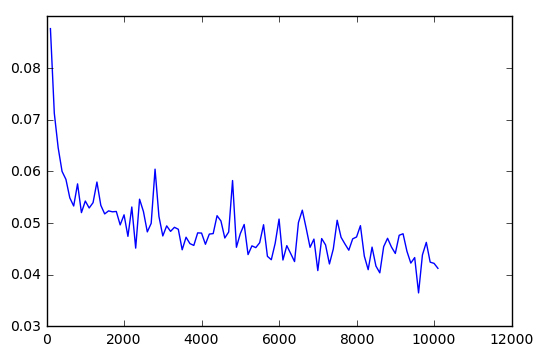

In [221]:
fig = plt.figure()
plt.plot(epochs, dpns)

以下は作業中メモ

In [ ]:
!pip3 install ipdb

In [ ]:
from types import MethodType
layer1.train_layer = MethodType(train_layer, layer1, Layer)

In [ ]:
print(t)

In [ ]:
from IPython.core.debugger import Tracer
Tracer()()